<a href="https://colab.research.google.com/github/ayalazech/MAT-421/blob/main/Module_F_Section_20_1%2C_20_2%2C_20_3%2C_20_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**20.1 and 20.2: Numerical Differentiation Problem Statement and Finite Difference Approximating Derivatives**

---



Example: Consider the function f(x)=sin(x) and compute the first derivative numerically.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-poster')
%matplotlib inline

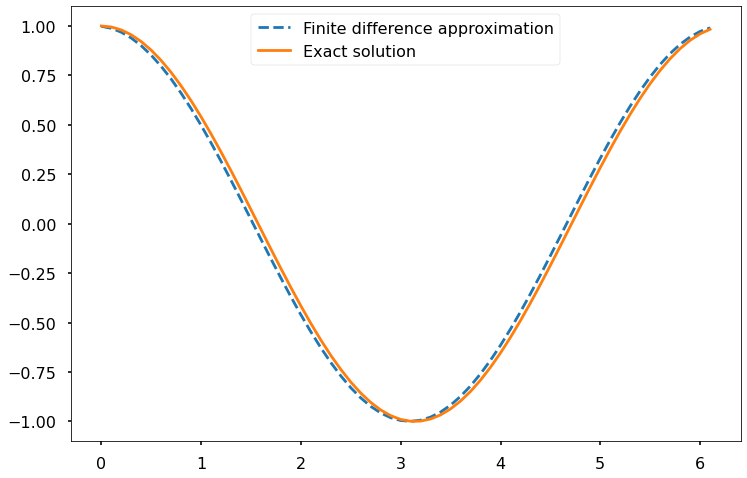

0.04997515074549317


In [7]:
# step size
h = 0.1
# define grid
x = np.arange(0, 2*np.pi, h) 
# compute function
y = np.sin(x) 

# compute vector of forward differences
forward_diff = np.diff(y)/h 
# compute corresponding grid
x_diff = x[:-1:] 
# compute exact solution
exact_solution = np.cos(x_diff) 

# Plot solution
plt.figure(figsize = (12, 8))
plt.plot(x_diff, forward_diff, '--', \
         label = 'Finite difference approximation')
plt.plot(x_diff, exact_solution, \
         label = 'Exact solution')
plt.legend()
plt.show()

# Compute max error between 
# numerical derivative and exact solution
max_error = max(abs(exact_solution - forward_diff))
print(max_error)

Example: Compute the numerical derivative of f(x)=sin(x)
 using the forward difference formula for decreasing step sizes, h
. Then plot the maximum error between the approximated derivative and the true derivative versus **h**.

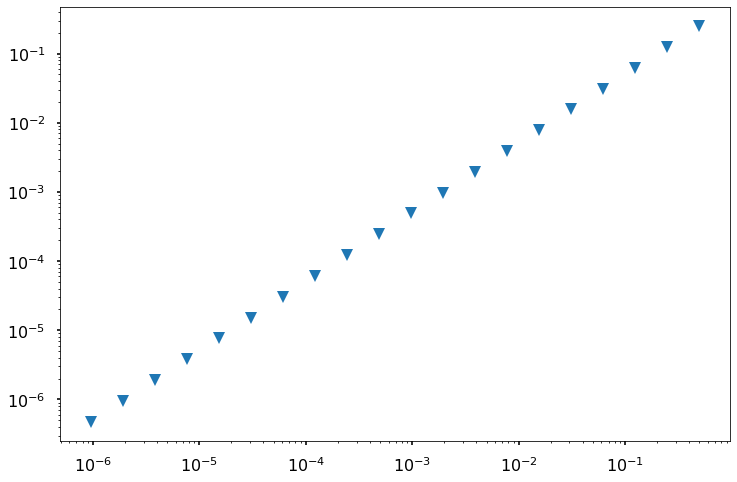

In [8]:
# define step size
h = 1
# define number of iterations to perform
iterations = 20 
# list to store our step sizes
step_size = [] 
# list to store max error for each step size
max_error = [] 

for i in range(iterations):
    # halve the step size
    h /= 2 
    # store this step size
    step_size.append(h) 
    # compute new grid
    x = np.arange(0, 2 * np.pi, h) 
    # compute function value at grid
    y = np.sin(x) 
    # compute vector of forward differences
    forward_diff = np.diff(y)/h 
    # compute corresponding grid
    x_diff = x[:-1] 
    # compute exact solution
    exact_solution = np.cos(x_diff) 
    
    # Compute max error between 
    # numerical derivative and exact solution
    max_error.append(\
            max(abs(exact_solution - forward_diff)))

# produce log-log plot of max error versus step size
plt.figure(figsize = (12, 8))
plt.loglog(step_size, max_error, 'v')
plt.show()

**20.3: Approximating of Higher Order Derivatives**

---



Example: Calculate the second dericative of f(x)=sin(x) using taylor series approximation. 

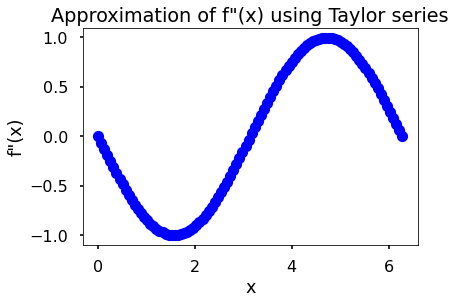

In [9]:
import numpy as np
import matplotlib.pyplot as plt

def f(x):
    return np.sin(x)

def taylor_2nd_deriv(x, h):
    return (f(x+h) - 2*f(x) + f(x-h)) / (h**2)

# Define the x values for the plot
x_values = np.linspace(0, 2*np.pi, 100)

# Compute the second derivative using the Taylor series approximation with h = 0.1
h = 0.1
deriv_values = [taylor_2nd_deriv(x, h) for x in x_values]

# Plot the results
plt.plot(x_values, deriv_values, 'bo')
plt.xlabel('x')
plt.ylabel('f"(x)')
plt.title('Approximation of f"(x) using Taylor series')
plt.show()


**20.4: Numerical Differentiation with Noise**

---



Example: Consider the following two functions:
f(x)=cos(x) and fϵ,ω(x)=cos(x)+ϵsin(ωx)
where 0<ϵ<=1
 is a very small number and ω
 is a large number. When ϵ
 is small, it is clear that f≃fϵ,ω
. To illustrate this point, we plot fϵ,ω(x)
 for ϵ=0.01
 and ω=100
, and we can see it is very close to f(x)
, as shown in the following figure.

In [6]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-poster')
%matplotlib inline

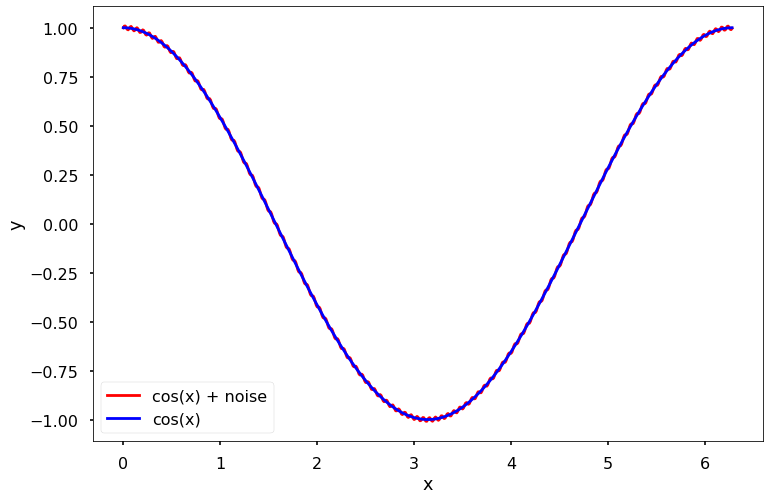

In [7]:
x = np.arange(0, 2*np.pi, 0.01) # Generate an array of values from 0 to 2π with a step of 0.01 using numpy's arange function

omega = 100 # Define a constant value for omega
epsilon = 0.01 # Define a constant value for epsilon

y = np.cos(x) # Compute the cosine of each element in the x array using numpy's cos function and assign the result to y

y_noise = y + epsilon*np.sin(omega*x) # Add noise to the y array by multiplying epsilon with the sine of omega times each element in the x array and adding the result to the y array

# Create a new figure for the plot with a size of 12 inches by 8 inches
plt.figure(figsize = (12, 8))

# Plot the y_noise array as a red line with a label of 'cos(x) + noise'
plt.plot(x, y_noise, 'r-', label = 'cos(x) + noise')

# Plot the y array as a blue line with a label of 'cos(x)'
plt.plot(x, y, 'b-', label = 'cos(x)')

# Set the label for the x-axis of the plot to 'x'
plt.xlabel('x')

# Set the label for the y-axis of the plot to 'y'
plt.ylabel('y')

# Add a legend to the plot using the labels from the previous plot commands
plt.legend()

# Show the plot
plt.show()


The derivatives of our two test functions are
f′(x)=−sin(x) and
f′ϵ,ω(x)=−sin(x)+ϵωcos(ωx).
Since ϵω
 may not be small when ω
 is large, the contribution of the noise to the derivative may not be small. As a result, the derivative (analytic and numerical) may not be usable. For instance, the following figure shows f′(x)
 and f′ϵ,ω(x)
 for ϵ=0.01
 and ω=100
.

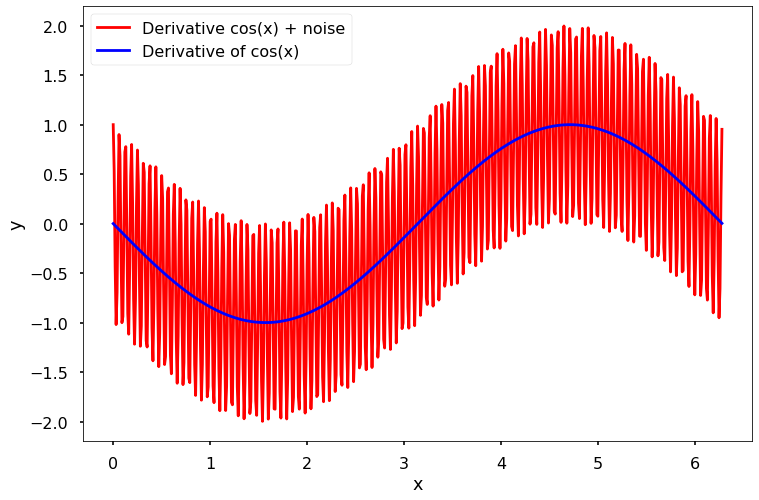

In [8]:


x = np.arange(0, 2*np.pi, 0.01) # Generate an array of values from 0 to 2π with a step of 0.01 using numpy's arange function

y = -np.sin(x) # Compute the derivative of the cosine function (which is equal to negative sine) for each element in the x array using numpy's sin function and assign the result to y

y_noise = y + epsilon*omega*np.cos(omega*x) # Add noise to the y array by multiplying epsilon and omega with the cosine of omega times each element in the x array and adding the result to the y array

# Create a new figure for the plot with a size of 12 inches by 8 inches
plt.figure(figsize = (12, 8))

# Plot the y_noise array as a red line with a label of 'Derivative cos(x) + noise'
plt.plot(x, y_noise, 'r-', label = 'Derivative cos(x) + noise')

# Plot the y array as a blue line with a label of 'Derivative of cos(x)'
plt.plot(x, y, 'b-', label = 'Derivative of cos(x)')

# Set the label for the x-axis of the plot to 'x'
plt.xlabel('x')

# Set the label for the y-axis of the plot to 'y'
plt.ylabel('y')

# Add a legend to the plot using the labels from the previous plot commands
plt.legend()

# Show the plot
plt.show()
